#### Student Name: Vivian
#### Student ID: A17442498


# Assignment 1

### Probability (Mozart Dice Game), Fourier Transforms (Find Frequency)

Instructions: 

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be completed individually.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

After completing the assignment, please submit this notebook as a PDF and your Mozart Dice Game MIDI.

Make sure to mark the page with your solution for each problem on Gradescope. Any problems without the correct pages marked may receive a score of 0. 

Mozart Dice Game
--------------

For this section of the assignment, you will implement the Mozart Dice Game using MIDI. 

Your composition will be a 16-measure minuet using 'dice rolls' (random generation in Python). 
Please check out the interactive demo available here (http://www.playonlinedicegames.com/mozart). 

Please see the code in the cell below for an example of combining MIDI files together (since you will be combining musical cells to create your Mozart Dice Game composition). You may want to install MIT's music21 python library (http://web.mit.edu/music21/) using pip. If you would rather combine MIDI files with another method, feel free to explore. 

The MIDI files, created by Packard Humanities Institute's Center for Computer Assisted Research in the Humanities at Stanford University, can be found in a .zip archive in the assignment repository. 

The code cell below also contains the filenames of candidate phrases for each of the 16 measures of your Mozart Dice Menuet (A1-B8). Using a random 'dice roll,' you will select one of the candidates for that measure of your minuet. The final product is the stitched-together combination of all 16 measures, selected via dice roll. 

Please save a .midi file of your randomly generated minuet to submit to Gradescope.

In [8]:
%pip install music21

from music21 import midi as midi21
from music21 import stream
import copy
import music21
import soundfile as sf
from __future__ import  division
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy
from scipy import signal
import librosa
%matplotlib inline
import IPython.display as ipydisplay
from IPython.display import Audio, display

def play(x):
    """Returns nothing. Outputs a midi realization of x, a note or stream.
    Primarily for use in notebooks and web environments.
    """  
    if isinstance(x, stream.Stream):
        x = copy.deepcopy(x)
        for subStream in x.recurse(streamsOnly=True, includeSelf=True):
            mss = subStream.getElementsByClass(stream.Measure)
            for ms in mss:
                ms.offset += 1.0
    if isinstance(x, music21.note.Note):
        s = stream.Stream()
        s.append(music21.note.Rest(1))
        s.append(x)
        x = s
    x.show('midi')

mf1 = midi21.MidiFile()
mf1.open("mozartdicegame/cda001.mid")
mf1.read()
mf1.close()
s1 = midi21.translate.midiFileToStream(mf1)

mf2 = midi21.MidiFile()
mf2.open("mozartdicegame/cda002.mid")
mf2.read()
mf2.close()
s2 = midi21.translate.midiFileToStream(mf2)

myStream = stream.Stream()
myStream.append(s1)
myStream.append(s2)
myStream.makeMeasures(inPlace = True)
play(myStream)
myStream.write('midi', fp='combined_midi.mid')


A1 = "070 010 033 036 105 165 007 142 099 085 145"
A2 = "014 064 001 114 150 152 081 106 068 045 097"
A3 = "164 100 160 008 057 112 131 040 086 090 006"
A4 = "122 012 163 035 071 015 037 069 139 158 121"
A5 = "025 149 077 111 117 147 021 043 120 082 056"
A6 = "153 030 156 039 052 027 125 140 092 123 067"
A7 = "018 161 168 137 132 073 049 023 143 078 063" 
A8 = "167 011 172 044 130 102 115 089 083 058 016"

B1 = "155 148 022 004 136 144 116 066 093 061 050"
B2 = "003 028 176 157 091 104 133 124 055 034 079" 
B3 = "162 135 062 038 138 087 072 026 029 119 175" 
B4 = "170 173 126 009 019 107 141 084 051 046 076" 
B5 = "013 169 031 151 134 128 094 075 042 059 113" 
B6 = "166 174 024 032 101 048 080 103 110 054 088" 
B7 = "095 002 159 017 154 109 129 096 108 060 053" 
B8 = "005 020 041 171 146 074 065 127 098 047 118" 


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Question 1 (Including Output MIDI) [30 points]

In [9]:

import os
import random
from music21 import midi as midi21
from music21 import stream

midi_folder = "mozartdicegame"  


available_snippets = [f"cda{str(i).zfill(3)}.mid" for i in range(1, 157)] 

selected_snippets = random.sample(available_snippets, 16)

final_score = stream.Score()

for filename in selected_snippets:
    midi_path = os.path.join(midi_folder, filename)
    try:
        snippet_stream = midi21.translate.midiFilePathToStream(midi_path)
        final_score.append(snippet_stream)
    except Exception as e:
        print(f"⚠️ Could not load {filename}: {e}")

output_file = "mozart_dice_game_output.mid"
final_score.write("midi", fp=output_file)

print(f"🎶 Random Mozart-style minuet saved as: {output_file}")


🎶 Random Mozart-style minuet saved as: mozart_dice_game_output.mid


Fourier Transform
--------------

The Discrete Fourier Transform (DFT) is the primary analysis tool for digital signal processing. By using matrix/vector representation, the DFT can be understood as a transformation of digital signals into a new vector space.

In this space  the columns of the DFT are the basis vectors. One important idea is that we call these vectors as "frequencies", but mathematically they simply represent the original data in a different space.

This is the mathematical definition of DFT matrix

$$ \mathbf{U} = \frac{1}{\sqrt N} \left[ \exp \left( j \frac{2\pi}{N} n k \right) \right]_{n\in\{0,N_s-1\},k\in\{0,N-1\}} $$


where $n$ counts the samples as rows and $k$ indexes the discrete frequencies (which are our new basis) as columns. 

##### Question 2 [30 points]

In [10]:
def dftmatrix(Nfft=32, N=None):
    'Construct DFT matrix of shape (N, Nfft)'
    if N is None:
        N = Nfft
    k = np.arange(Nfft).reshape(1, -1)  
    n = np.arange(N).reshape(-1, 1)   
    
    U = np.exp(1j * 2 * np.pi * n * k / Nfft)  
    return U / np.sqrt(Nfft)

Nfft=8
Ns=8
U = dftmatrix(Nfft=Nfft,N=Ns)

We can plot these basis as pairs of real and imaginary vectors

Text(0.5, 0, 'n')

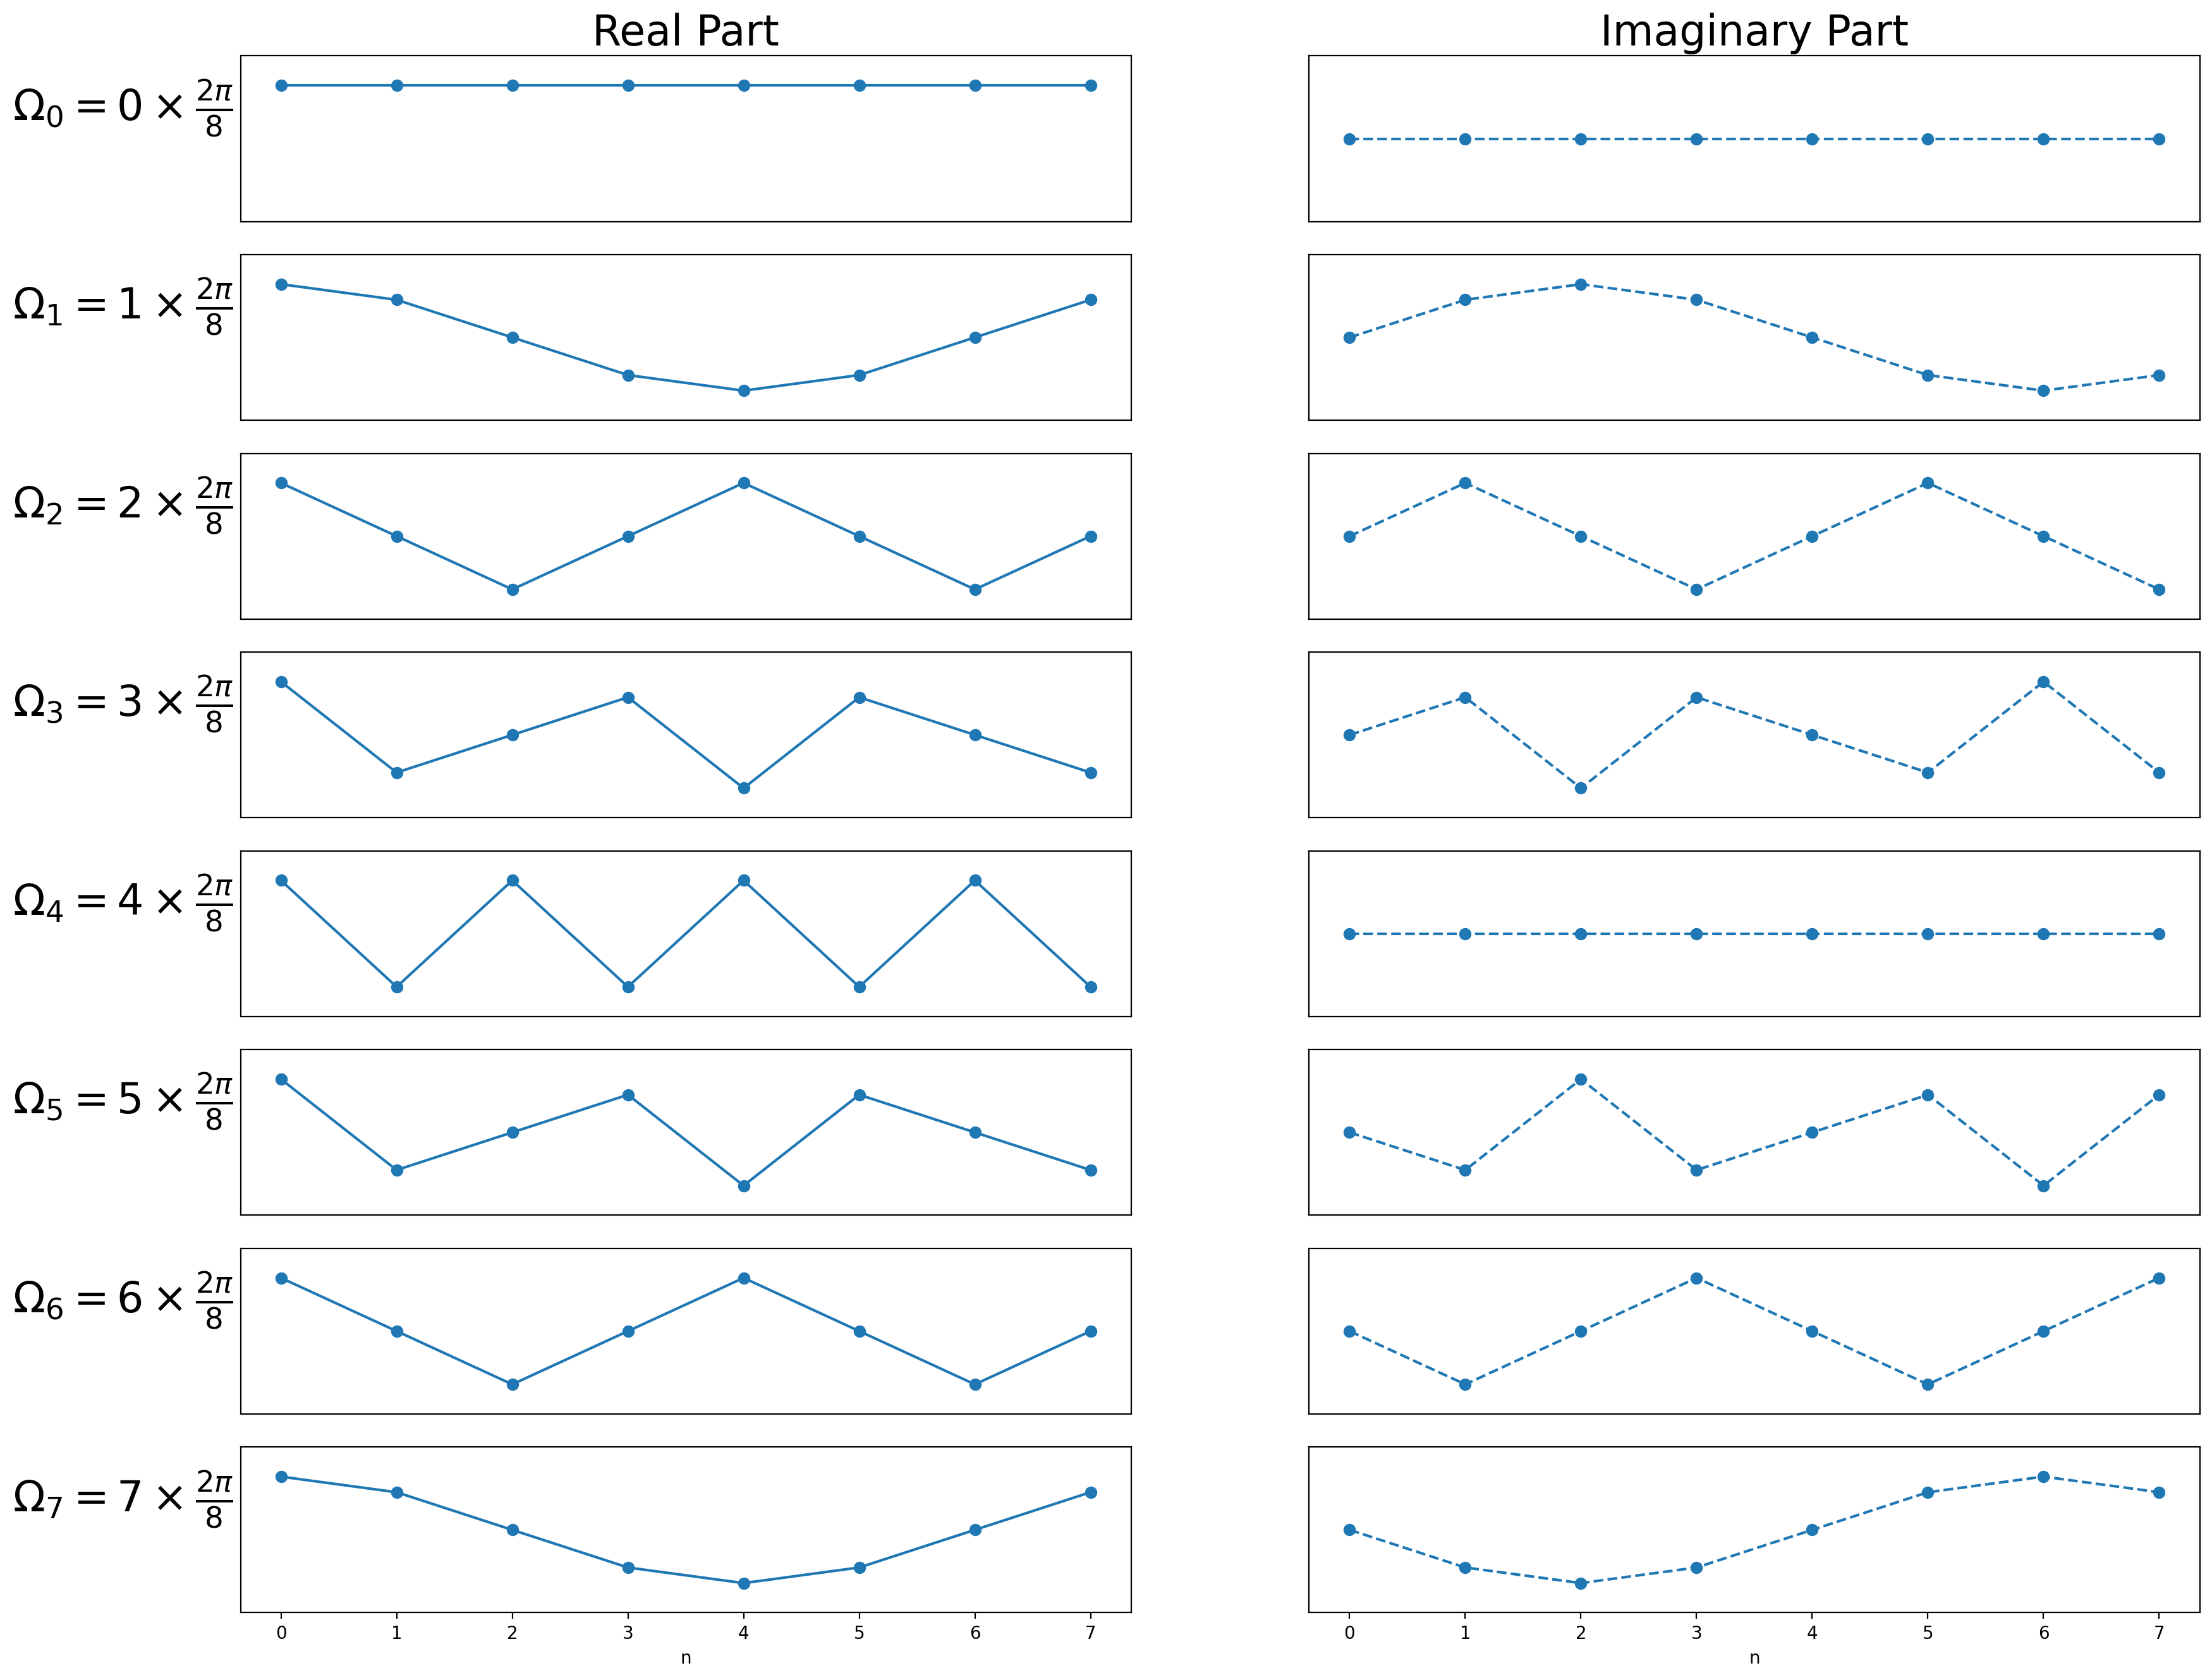

In [11]:
plt.rcParams['figure.figsize'] = (20, 16)

# plots in the left column
plt.subplot(Nfft,2,1)
plt.title('Real Part',fontsize=24)

for i in range(Nfft):
    plt.subplot(Nfft,2,2*i+1)
    plt.xticks([]);  plt.yticks([])
    plt.ylabel(r'$\Omega_{%d}=%d\times\frac{2\pi}{8}$'%(i,i),fontsize=24, 
        rotation='horizontal',horizontalalignment='right')
    plt.plot(np.array(U.real[:,i]),'-o')
    plt.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
plt.xticks(np.arange(Nfft))
plt.xlabel('n')

# plots in the  right column
plt.subplot(Nfft,2,2)
plt.title('Imaginary Part',fontsize=24)

for i in range(Nfft):
    ax=plt.subplot(Nfft,2,2*(i+1))
    plt.xticks([]);  plt.yticks([])
    plt.plot(np.array(U.imag[:,i]),'--o')
    plt.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)    
plt.xticks(np.arange(Nfft))
plt.xlabel('n')

##### Question 3 [10 points]
we observe that each frequency component is periodic, which reflects the periodicity of the DFT. The real parts resemble cosine waves while the imaginary parts resemble sine waves, with both increasing in frequency as the index increases. At  𝑘=0, the DC component is a constant signal with a real value and no imaginary part. At k=4, which corresponds to the Nyquist frequency. The symmetry between the basis vectors: for any frequency N−k are complex conjugates, which is visible in how the real parts mirror and the imaginary parts are sign-flipped. This conjugate symmetry is a key feature of the DFT. Overall, the basis functions are orthogonal, meaning each captures unique frequency content, and together they form a complete basis for transforming signals from the time domain to the frequency domain.



``Your response here``

Computing the DFT
--------------------

To compute the DFT using the matrix, we calculate the following,

$$ \mathbf{X} = \mathbf{U}^H \mathbf{x}$$

which individually takes each of the columns of $\mathbf{U}$ and computes the inner product as the $i^{th}$ entry,

$$ \mathbf{X}_i = \mathbf{U}_i^H \mathbf{x}$$

That is, we are measuring the *degree of similarity* between each column of $\mathbf{U}$ and the input vector. We can think of this as the coefficient of the projection of $\mathbf{x}$ onto  $\mathbf{u}_i$.

We can retrieve the original input from the DFT by calculating

$$ \mathbf{x} = \mathbf{U} \mathbf{X} $$

### Example: finding a frequency of a signal

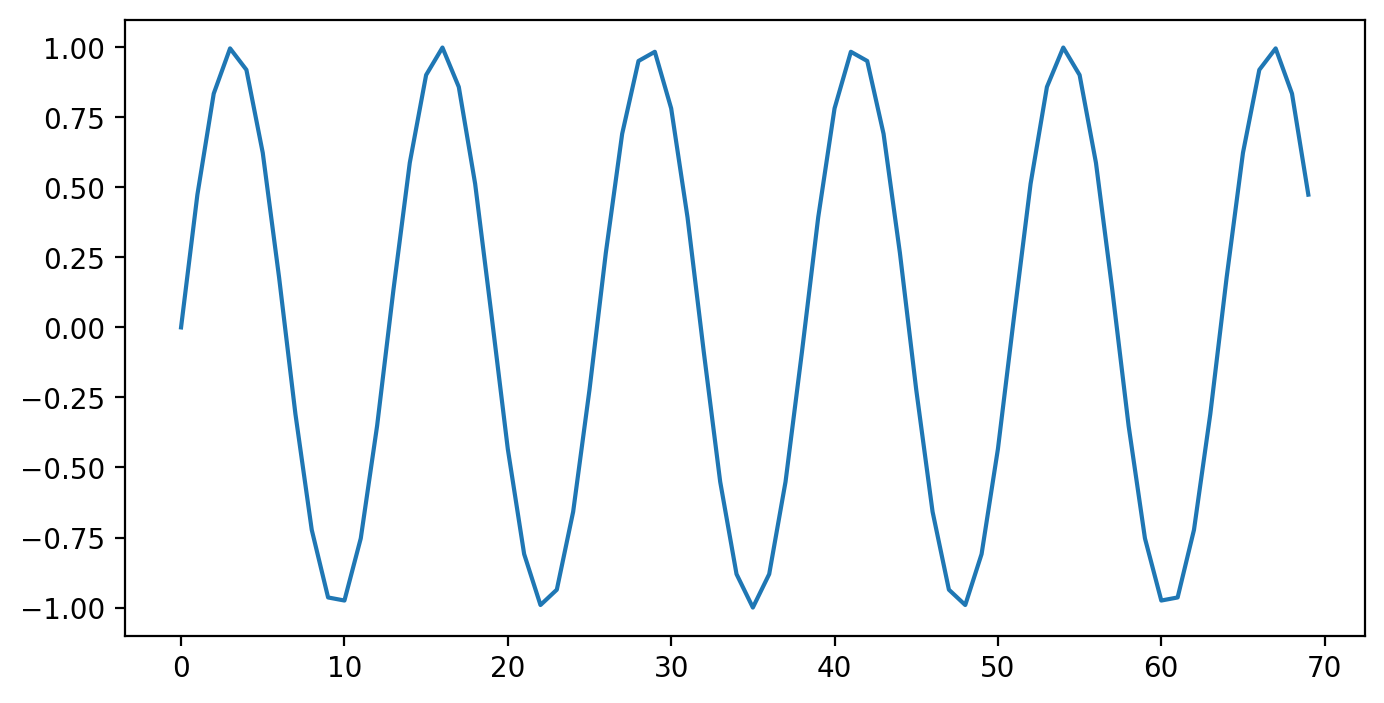

In [6]:
plt.rcParams['figure.figsize'] = (8, 4)

Ns = 70
freq = 5.5/Ns
t = np.arange(Ns)
x = np.sin(2*np.pi*freq*t)
plt.plot(x)
plt.show()

##### Question 4 [20 points]

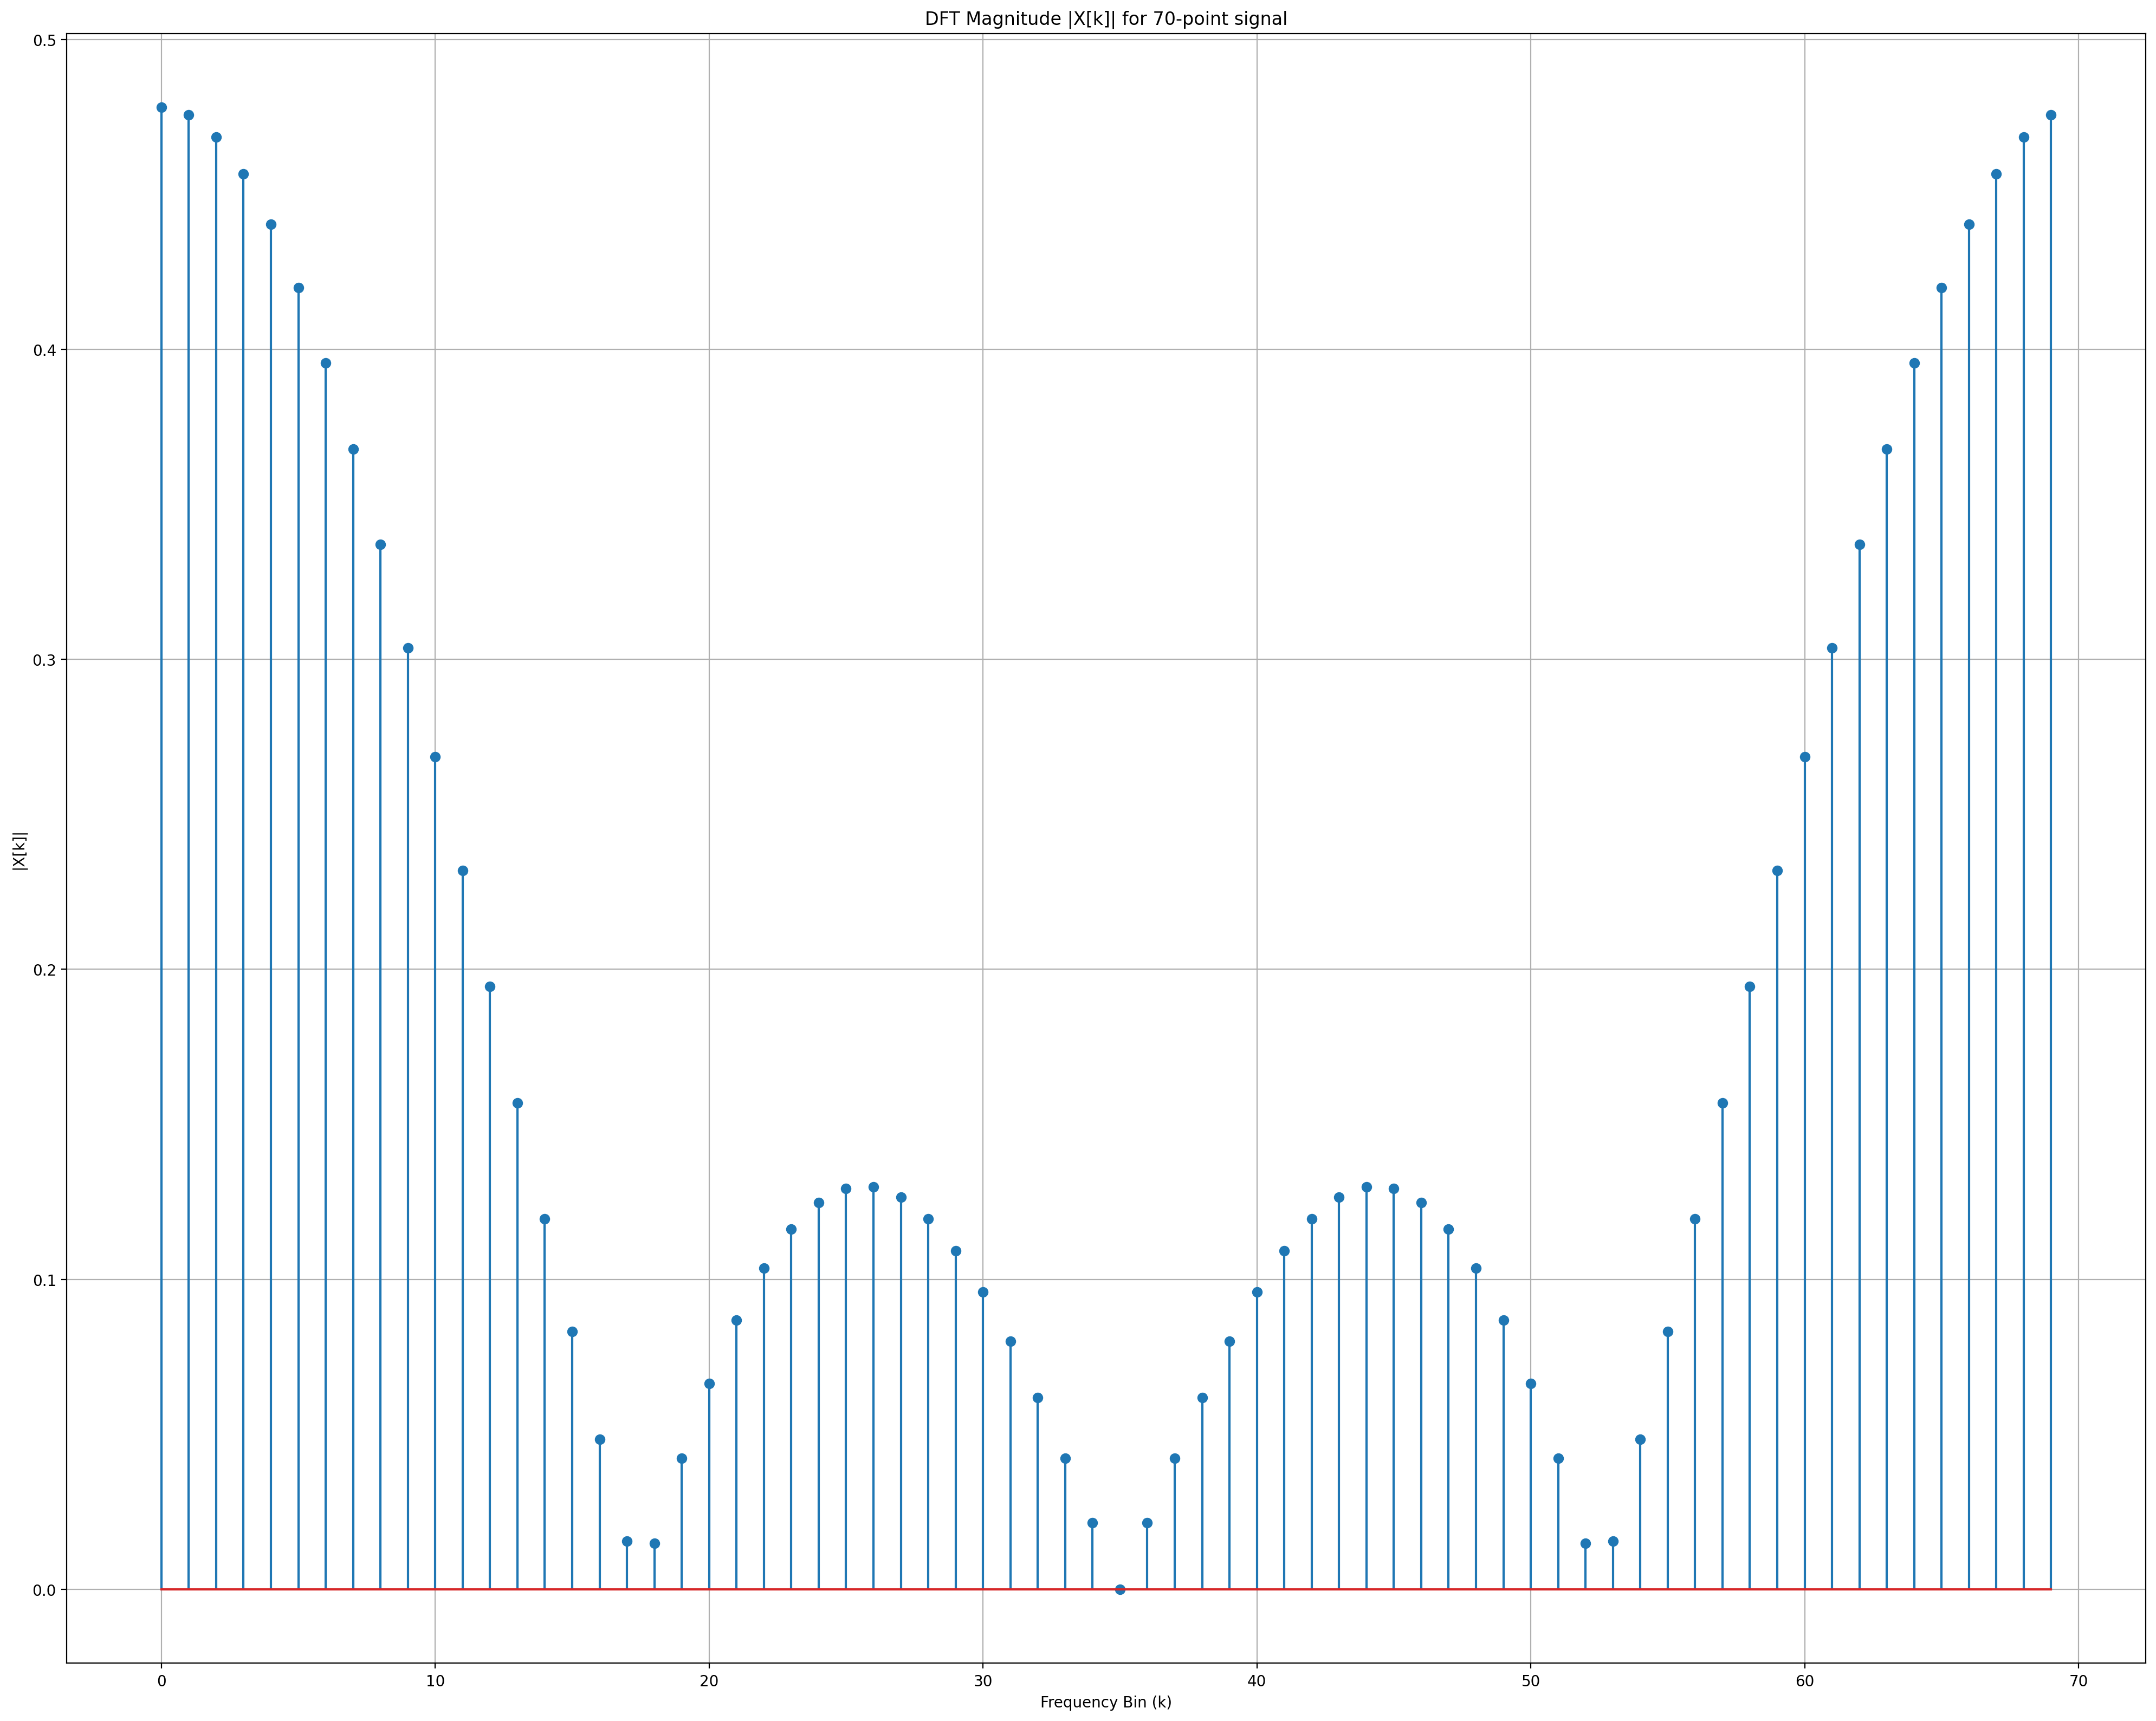

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define your original short signal (8 samples)
x = np.array([1, 1, 1, 1, 0, 0, 0, 0])

# Pad the signal to length 70
x = np.pad(x, (0, 70 - len(x)), mode='constant')

# Now set dimensions
Nfft = Ns = len(x)

# DFT matrix function
def dftmatrix(Nfft=32, N=None):
    '''Construct DFT matrix'''
    if N is None:
        N = Nfft
    n = np.arange(N).reshape((N, 1))
    k = np.arange(Nfft).reshape((1, Nfft))
    W = np.exp(2j * np.pi * n * k / Nfft)
    U = W / np.sqrt(Nfft)
    return U

# Compute the DFT
U = dftmatrix(Nfft=Nfft, N=Ns)
x = np.matrix(x).T  # Convert to column vector (70x1)
X = U.conj().T @ x  # DFT (70x1)

# Plot magnitude spectrum
plt.stem(np.abs(X))

plt.title("DFT Magnitude |X[k]| for 70-point signal")
plt.xlabel("Frequency Bin (k)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Question 5 [10 points]

Where do you observe peaks in the DFT plot? How would you describe the DFT plot symmetry? 

In the DFT plot, we observe clear peaks at frequency  0, 1, 3, 5, and 7. The peaks at bins 1 and 7, as well as 3 and 5, are mirrored around the midpoint (4), which shows a value near zero. This symmetry is a common property of the DFT. This means the frequency content at bin k has a corresponding mirrored component at N−k. The peak at bin 0 corresponds to the DC (average) component, while the other peaks reflect harmonic content due to the sharp transition in the original signal.